In [16]:
pip install google-play-scraper pandas

In [17]:
import pandas as pd
from google_play_scraper import Sort, reviews

# --- Konfigurasi Scraping ---
APP_ID = 'com.openai.chatgpt'
JUMLAH_ULASAN = 1500
NEGARA = 'id'
BAHASA = 'id'
NAMA_FILE_OUTPUT_SCRAPING = f'ulasan_chatgpt_raw_{NEGARA}_{JUMLAH_ULASAN}.csv' # Nama file untuk data mentah
NAMA_FILE_OUTPUT_CLEAN = f'ulasan_chatgpt_clean_{NEGARA}_{JUMLAH_ULASAN}.csv' # Nama file untuk data bersih

print(f"Memulai pengambilan {JUMLAH_ULASAN} ulasan untuk {APP_ID}...")

# 1. Proses Scraping
try:
    result, continuation_token = reviews(
        APP_ID,
        lang=BAHASA,
        country=NEGARA,
        sort=Sort.NEWEST,
        count=JUMLAH_ULASAN,
        filter_score_with=None
    )
    df_ulasan = pd.DataFrame(result)
except Exception as e:
    print(f"Terjadi kesalahan saat scraping: {e}")
    df_ulasan = pd.DataFrame() # Membuat DataFrame kosong jika gagal

# Memastikan ada data yang diambil
if df_ulasan.empty:
    print("Pengambilan data gagal atau tidak ada ulasan yang ditemukan.")
else:
    print("\nPengambilan data scraping selesai.")
    print(f"Total {len(df_ulasan)} ulasan berhasil diambil.")
    print("\nContoh 5 baris pertama data mentah:")
    print(df_ulasan.head())

    # Menyimpan data hasil scraping mentah ke file CSV
    print(f"\nMenyimpan data scraping mentah ke file: {NAMA_FILE_OUTPUT_SCRAPING}")
    df_ulasan.to_csv(NAMA_FILE_OUTPUT_SCRAPING, index=False, encoding='utf-8')

Memulai pengambilan 1500 ulasan untuk com.openai.chatgpt...

Pengambilan data scraping selesai.
Total 1500 ulasan berhasil diambil.

Contoh 5 baris pertama data mentah:
                               reviewId        userName  \
0  9985f54e-598c-484d-b609-b9fb73e08548   Achmad Taufik   
1  ba41cf2b-6373-4a8c-aeef-7d9d692bc37b  Minoki Iruyuki   
2  be80d93d-3278-4bd0-837a-9b3756acec6d   Tirta adi adi   
3  bc232f67-e8d0-40e8-a7de-c399cef9ffff  Arman Arliando   
4  50a26d60-0aa6-42e3-8a19-eba4dc71e533    Lina Susanti   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ACg8oc...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a/ACg8oc...   

                                             content  score  thumbsUpCount  \
0                                 Pokoknya keren deh      5  

In [18]:
# 2. Case Folding (Preprocessing)
if not df_ulasan.empty:
    print("\nMelakukan Case Folding pada kolom 'content' (ulasan)...")
    # Fungsi lambda ini akan mengubah semua teks di kolom 'content' menjadi huruf kecil
    df_ulasan['content_clean'] = df_ulasan['content'].apply(lambda x: x.lower())

    # 3. Pemilihan Kolom dan Penyimpanan
    kolom_dipilih = [
        'userName',
        'score',
        'content',
        'content_clean', # Kolom baru hasil Case Folding
        'at',
        'thumbsUpCount'
    ]

    df_output = df_ulasan[kolom_dipilih]

    # Menyimpan data hasil case folding ke file CSV
    print(f"\nMenyimpan data hasil case folding ke file: {NAMA_FILE_OUTPUT_CLEAN}")
    df_output.to_csv(NAMA_FILE_OUTPUT_CLEAN, index=False, encoding='utf-8')

    print("\n--- Selesai ---")
    print(f"Total {len(df_output)} ulasan berhasil diproses.")
    print(f"Data tersimpan di file: {NAMA_FILE_OUTPUT_CLEAN}")
    print("\nContoh 5 baris pertama data (termasuk kolom content_clean):")
    display(df_output.head())
else:
    print("Tidak ada data untuk diproses (DataFrame df_ulasan kosong).")


Melakukan Case Folding pada kolom 'content' (ulasan)...

Menyimpan data hasil case folding ke file: ulasan_chatgpt_clean_id_1500.csv

--- Selesai ---
Total 1500 ulasan berhasil diproses.
Data tersimpan di file: ulasan_chatgpt_clean_id_1500.csv

Contoh 5 baris pertama data (termasuk kolom content_clean):


,userName,score,content,content_clean,at,thumbsUpCount
0,Achmad Taufik,5,Pokoknya keren deh,pokoknya keren deh,2025-10-17 04:07:41,0
1,Minoki Iruyuki,5,mantap poll,mantap poll,2025-10-17 04:04:24,0
2,Tirta adi adi,3,bug kelempar riwayat tolong benerin,bug kelempar riwayat tolong benerin,2025-10-17 03:58:00,0
3,Arman Arliando,1,"Sudah tidak membantu sama sekali, performanya ...","sudah tidak membantu sama sekali, performanya ...",2025-10-17 03:51:08,0
4,Lina Susanti,5,bagus banget cepat buat nya.. makasih,bagus banget cepat buat nya.. makasih,2025-10-17 03:45:05,0


In [19]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk

In [20]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# 4.Hapus duplikat berdasarkan teks ulasan
print("\nMenghapus duplikat ulasan...")
df_output.drop_duplicates(subset='content_clean', inplace=True)
print(f"Total setelah hapus duplikat: {len(df_output)} ulasan.")


Menghapus duplikat ulasan...
Total setelah hapus duplikat: 1065 ulasan.


/tmp/ipython-input-740527934.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output.drop_duplicates(subset='content_clean', inplace=True)


In [22]:
# 5.Normalisasi kata (Slank -> Baku)
# Kamus sederhana kata tidak baku ke baku (bisa diperluas)
kamus_normalisasi = {
    'gk': 'nggak',
    'ga': 'tidak',
    'nggk': 'tidak',
    'tdk': 'tidak',
    'udh': 'sudah',
    'udah': 'sudah',
    'bgt': 'banget',
    'bgt.': 'banget',
    'aja': 'saja',
    'dg': 'dengan',
    'dgn': 'dengan',
    'trs': 'terus',
    'tp': 'tapi',
    'blm': 'belum',
    'sy': 'saya',
    'aq': 'aku',
    'sm': 'sama',
    'jd': 'jadi',
    'krn': 'karena',
    'lg': 'lagi',
    'mksd': 'maksud',
    'bikin': 'membuat',
    'ok': 'oke'
}

def normalisasi_kata(text):
    words = text.split()
    return ' '.join([kamus_normalisasi.get(word, word) for word in words])

print("\nMelakukan normalisasi kata...")
df_output['content_normalized'] = df_output['content_clean'].apply(normalisasi_kata)


Melakukan normalisasi kata...


/tmp/ipython-input-861703545.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output['content_normalized'] = df_output['content_clean'].apply(normalisasi_kata)


In [23]:
# 6. Bersihkan Teks (hapus angka, tanda baca, stopword)
import nltk
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


stop_words = set(stopwords.words('indonesian'))

def bersihkan_teks(text):
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # Hapus tanda baca
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

print("\nMembersihkan teks (hapus angka, tanda baca, stopwords)...")
df_output['content_clean_final'] = df_output['content_normalized'].apply(bersihkan_teks)


Membersihkan teks (hapus angka, tanda baca, stopwords)...


/tmp/ipython-input-30393346.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output['content_clean_final'] = df_output['content_normalized'].apply(bersihkan_teks)


In [24]:
# 7. Analisis Bigram & Trigram
print("\nMembentuk Bigram dan Trigram...")

def get_ngrams(text, n):
    tokens = word_tokenize(text)
    return list(ngrams(tokens, n))

# Gabungkan semua teks
all_text = ' '.join(df_output['content_clean_final'])

tokens = word_tokenize(all_text)

# Bigram dan trigram
bigrams = list(ngrams(tokens, 2))
trigrams = list(ngrams(tokens, 3))

# Hitung frekuensi
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Tampilkan 10 bigram & trigram paling sering
print("\n10 Bigram paling sering muncul:")
for k, v in bigram_freq.most_common(10):
    print(f"{k} : {v}")

print("\n10 Trigram paling sering muncul:")
for k, v in trigram_freq.most_common(10):
    print(f"{k} : {v}")


Membentuk Bigram dan Trigram...

10 Bigram paling sering muncul:
('chat', 'gpt') : 40
('bagus', 'banget') : 22
('bagus', 'membantu') : 17
('aplikasi', 'nya') : 13
('nya', 'bagus') : 13
('aplikasi', 'bagus') : 13
('terima', 'kasih') : 11
('the', 'best') : 9
('membantu', 'tugas') : 8
('membantu', 'pekerjaan') : 8

10 Trigram paling sering muncul:
('aplikasi', 'nya', 'bagus') : 5
('bagus', 'banget', 'membantu') : 4
('kga', 'duit', 'kga') : 4
('duit', 'kga', 'duit') : 4
('bagus', 'aplikasi', 'nya') : 3
('aplikasinya', 'bagus', 'membantu') : 3
('nya', 'gak', 'nyambung') : 3
('banget', 'aplikasi', 'nya') : 3
('terimakasih', 'chat', 'gpt') : 3
('nya', 'cepat', 'bagus') : 2



Menampilkan WordCloud dari ulasan bersih...


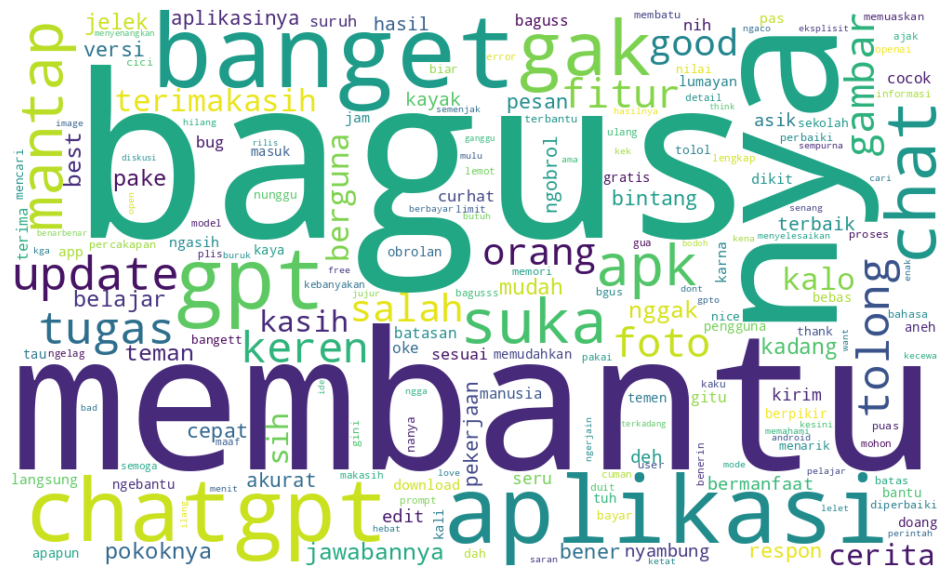

In [25]:
# 8. Visualisasi WordCloud
print("\nMenampilkan WordCloud dari ulasan bersih...")
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=1000, height=600, background_color='white', collocations=False).generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# 9. Simpan Hasil Akhir ke File
NAMA_FILE_OUTPUT_FINAL = f'ulasan_chatgpt_final_{NEGARA}_{JUMLAH_ULASAN}.csv'
df_output.to_csv(NAMA_FILE_OUTPUT_FINAL, index=False, encoding='utf-8')

print("\n--- Proses selesai ---")
print(f"Data akhir berhasil disimpan di: {NAMA_FILE_OUTPUT_FINAL}")
print("\nContoh 5 baris hasil preprocessing final:")
display(df_output[['content', 'content_clean_final']].head())


--- Proses selesai ---
Data akhir berhasil disimpan di: ulasan_chatgpt_final_id_1500.csv

Contoh 5 baris hasil preprocessing final:


,content,content_clean_final
0,Pokoknya keren deh,pokoknya keren deh
1,mantap poll,mantap poll
2,bug kelempar riwayat tolong benerin,bug kelempar riwayat tolong benerin
3,"Sudah tidak membantu sama sekali, performanya ...",membantu performanya seakurat kali rilis ambur...
4,bagus banget cepat buat nya.. makasih,bagus banget cepat nya makasih
